In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os

# Define font
font_path = "/Library/Fonts/SimHei.ttf"
font_prop = FontProperties(fname=font_path)

# List of files to process
file_paths = [
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/动力煤.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/焦炭Ⅱ.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/焦炭Ⅲ.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/焦煤.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/煤化工.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/煤炭.csv',
    '/Users/ash/Desktop/毕业/writer/data/申万行业指数/煤炭开采.csv'
]

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 8))

# Process each file
for file_path in file_paths:
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Make a copy of the dataframe
    df_processed = df.copy()
    
    # Convert trade_date to datetime
    df_processed['trade_date'] = pd.to_datetime(df_processed['trade_date'], format='%Y%m%d')
    
    # Extract time features
    df_processed['year'] = df_processed['trade_date'].dt.year
    df_processed['month'] = df_processed['trade_date'].dt.month
    df_processed['day'] = df_processed['trade_date'].dt.day
    
    # Get the base filename for legend
    filename = os.path.basename(file_path).replace('.csv', '')
    
    # Plot total_mv over time
    ax.plot(df_processed['trade_date'], df_processed['total_mv'], label=filename)

# Configure plot
ax.set_xlabel('交易日期', fontproperties=font_prop)
ax.set_ylabel('总市值 (万元)', fontproperties=font_prop)
ax.set_title('申万行业指数 - 煤业相关行业总市值趋势', fontproperties=font_prop)
ax.legend(prop=font_prop)
ax.grid(True)

# Create output directory if not exists
output_dir = '/Users/ash/Desktop/毕业/writer/output/煤业2025/image'
os.makedirs(output_dir, exist_ok=True)

# Save the figure
output_path = os.path.join(output_dir, '申万行业指数_煤业总市值趋势.png')
fig.savefig(output_path, bbox_inches='tight')
plt.close()

print(f"Plot saved to: {output_path}")


Plot saved to: /Users/ash/Desktop/毕业/writer/output/煤业2025/image/申万行业指数_煤业总市值趋势.png


Data types:
name                  object
trade_date    datetime64[ns]
pe                   float64
pb                   float64
float_mv             float64
total_mv             float64
dtype: object

Numeric columns statistics:
               pe          pb      float_mv      total_mv
count  268.000000  268.000000  2.680000e+02  2.680000e+02
mean    11.760187    1.788507  2.984792e+07  1.332182e+08
std      8.268827    0.110562  2.477136e+06  7.715145e+06
min      9.100000    1.580000  2.654063e+06  1.140555e+08
25%     10.690000    1.700000  2.868424e+07  1.285338e+08
50%     11.305000    1.790000  2.998582e+07  1.339103e+08
75%     11.882500    1.880000  3.109630e+07  1.377203e+08
max    145.850000    2.020000  3.405668e+07  1.501780e+08

Correlation matrix for numeric columns:
                pe        pb  float_mv  total_mv
pe        1.000000  0.133554 -0.597504  0.212060
pb        0.133554  1.000000  0.504729  0.783108
float_mv -0.597504  0.504729  1.000000  0.650075
total_mv  0.

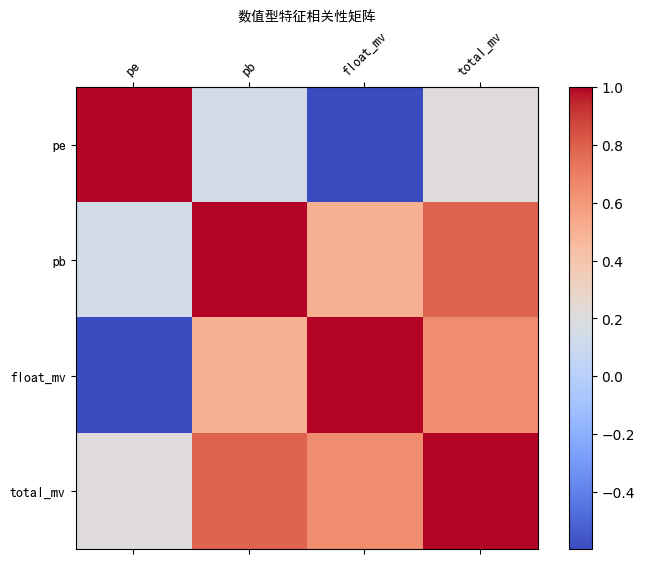

In [2]:
import numpy as np

# Check data types and basic statistics for one of the files (using the first file as example)
df = pd.read_csv(file_paths[0])
df['trade_date'] = pd.to_datetime(df['trade_date'], format='%Y%m%d')

print("Data types:")
print(df.dtypes)

print("\nNumeric columns statistics:")
numeric_cols = df.select_dtypes(include=[np.number])
print(numeric_cols.describe())

print("\nCorrelation matrix for numeric columns:")
corr_matrix = numeric_cols.corr()
print(corr_matrix)

# Visualize correlation matrix
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, fontproperties=font_prop)
ax.set_yticklabels(corr_matrix.columns, fontproperties=font_prop)
ax.set_title('数值型特征相关性矩阵', fontproperties=font_prop)
plt.show()


In [3]:
# Verify the plot was saved correctly
import os
output_path = '/Users/ash/Desktop/毕业/writer/output/煤业2025/image/申万行业指数_煤业总市值趋势.png'
if os.path.exists(output_path):
    print(f"Plot successfully saved at: {output_path}")
    print(f"File size: {os.path.getsize(output_path)/1024:.2f} KB")
else:
    print("Warning: Plot file not found at the specified location")


Plot successfully saved at: /Users/ash/Desktop/毕业/writer/output/煤业2025/image/申万行业指数_煤业总市值趋势.png
File size: 111.58 KB
